In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Read the dataset
import pandas as pd
df=pd.read_csv('iris.csv')

In [3]:
#Check first 5 records
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Perform basic data quality check
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.shape

(149, 5)

In [12]:
#seperate x and y
X = df.drop(columns=['species'])
Y = df[['species']]

In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [16]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [17]:
#Step 4: Apply preprocessing pipeline on X
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [19]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('sclaer', StandardScaler())]).set_output(transform='pandas')

In [20]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


In [21]:
#Step 5: Apply train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [22]:
xtrain.shape

(99, 4)

In [23]:
xtest.shape

(50, 4)

In [24]:
#Step 6: Create a KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=31)
model1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=31)

In [25]:
#Model Evaluation KNN
model1.score(xtrain, ytrain)

0.8888888888888888

In [26]:
model1.score(xtest, ytest)

0.92

In [27]:
#Tune the KNN model
params = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9]}

In [28]:
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
rscv = RandomizedSearchCV(knn, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8,
                                                        9]},
                   scoring='f1_macro')

In [29]:
rscv.best_params_

{'n_neighbors': 3}

In [30]:
rscv.best_score_

0.9029381729381729

In [31]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

In [32]:
best_knn.score(xtrain, ytrain)

0.9292929292929293

In [33]:
best_knn.score(xtest, ytest)

1.0

In [34]:
ypred_train1 = best_knn.predict(xtrain)
ypred_test1 = best_knn.predict(xtest)

In [35]:
ypred_train1[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [36]:
ytrain.head()

,species
95,versicolor
104,virginica
66,versicolor
0,setosa
141,virginica


In [37]:
ypred_test1[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [38]:
ytest.head()

,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


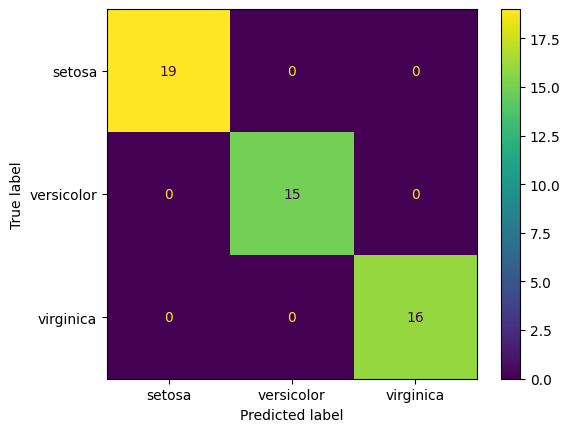

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_knn, xtest, ytest)

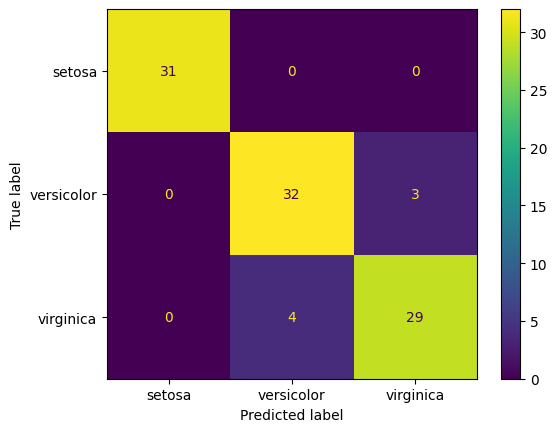

In [40]:
ConfusionMatrixDisplay.from_estimator(best_knn, xtrain, ytrain)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test1))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [42]:
#Building SVM
from sklearn.svm import SVC
model_svm = SVC(probability=True)
model_svm.fit(xtrain, ytrain)

SVC(probability=True)

In [43]:
model_svm.score(xtrain, ytrain)

0.9595959595959596

In [44]:
model_svm.score(xtest, ytest)

1.0

In [45]:
from sklearn.model_selection import cross_val_score
scores_svm = cross_val_score(model_svm, xtrain, ytrain, cv=5, scoring='f1_macro')
scores_svm

array([0.95213675, 0.80952381, 0.90277778, 1.        , 0.94747475])

In [46]:
scores_svm.mean()

0.9223826173826174

In [47]:
scores_knn = cross_val_score(best_knn, xtrain, ytrain, cv=5, scoring='f1_macro')
scores_knn

array([0.90277778, 0.80952381, 0.90277778, 0.95213675, 0.94747475])

In [48]:
scores_knn.mean()

0.9029381729381729

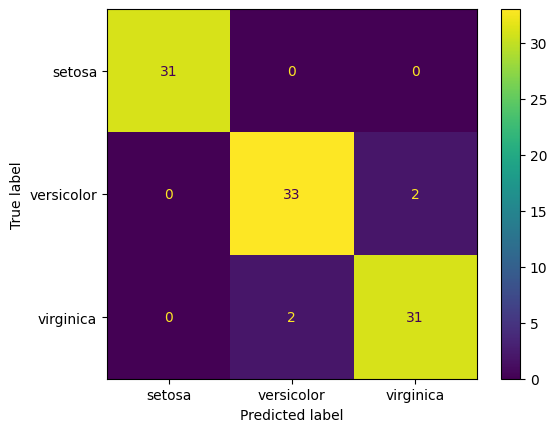

In [49]:
ConfusionMatrixDisplay.from_estimator(model_svm, xtrain, ytrain)

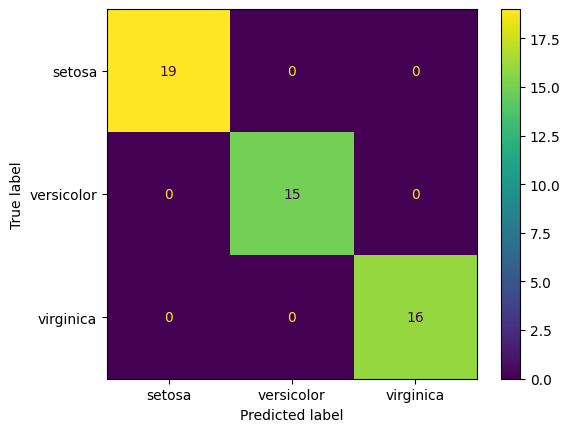

In [50]:
ConfusionMatrixDisplay.from_estimator(model_svm, xtest, ytest)

In [51]:
print(classification_report(ytest, model_svm.predict(xtest)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [52]:
#Select SVM from above because of Higher cross validation score of 0.9224


In [54]:
#Step 8: Perform out of sample prediction
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [55]:
num_pipe

Pipeline(steps=[('imputer', SimpleImputer()), ('sclaer', StandardScaler())])

In [56]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.000000,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,0.000000,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.000000


In [57]:
#Predict results with probabilty
preds = model_svm.predict(xnew_pre)
probs = model_svm.predict_proba(xnew_pre)

In [58]:
model_svm.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [59]:
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [60]:
probs

array([[0.00707592, 0.9695542 , 0.02336988],
       [0.01329359, 0.01849554, 0.96821087],
       [0.03055782, 0.95536767, 0.01407452],
       [0.64788689, 0.27710166, 0.07501145],
       [0.012438  , 0.21297814, 0.77458385],
       [0.96069929, 0.02156082, 0.01773989],
       [0.04425887, 0.94385399, 0.01188714],
       [0.00955277, 0.03178168, 0.95866554],
       [0.96724367, 0.01733814, 0.01541819],
       [0.82130036, 0.12759679, 0.05110285],
       [0.01137677, 0.98169888, 0.00692435],
       [0.01178051, 0.98106868, 0.00715081],
       [0.02299776, 0.02338245, 0.95361978],
       [0.01859318, 0.72563866, 0.25576816],
       [0.01983904, 0.51110726, 0.4690537 ]])

In [61]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.9695542 , 0.96821087, 0.95536767, 0.64788689, 0.77458385,
       0.96069929, 0.94385399, 0.95866554, 0.96724367, 0.82130036,
       0.98169888, 0.98106868, 0.95361978, 0.72563866, 0.51110726])

In [62]:
#Save above results to dataframe and csv
xnew['species_pred'] = preds 
xnew['prob'] = max_probs

In [63]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.969554
1,6.9,3.1,5.1,2.3,virginica,0.968211
2,5.1,2.5,3.0,1.1,versicolor,0.955368
3,4.4,2.9,NaN,0.2,setosa,0.647887
4,5.9,3.0,5.1,1.8,virginica,0.774584
5,5.5,3.5,1.3,0.2,setosa,0.960699
6,5.6,NaN,3.6,1.3,versicolor,0.943854
7,6.5,3.0,5.2,2.0,virginica,0.958666
8,5.3,3.7,1.5,0.2,setosa,0.967244
9,5.1,3.4,1.5,NaN,setosa,0.821300


In [64]:
xnew.to_csv('SVMResults.csv', index=False)